<a href="https://colab.research.google.com/github/dvinzed/Python_Lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)


2.18.0


In [ ]:
observations = 1000
xs = np.random.uniform(low=-10,high=10, size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
inputs = np.column_stack((xs,zs))
print(inputs.shape)

(1000, 2)


In [ ]:
noise = np.random.uniform(low=-1,high=1,size=(observations,1))
targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_dataset',inputs=inputs,targets=targets)
print(targets.shape)

(1000, 1)


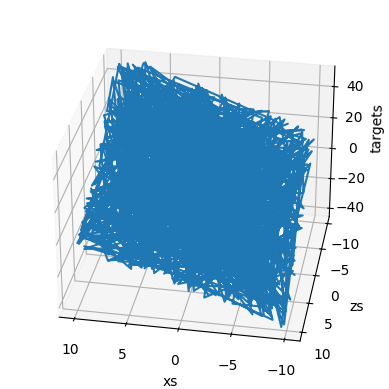

In [ ]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()

In [ ]:
init_range = 0.1
weights = np.random.uniform(low=-init_range,high=init_range,size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range,size=1)
print(weights)
print(biases)

[[-0.00575891]
 [ 0.02223117]]
[0.06138777]


In [ ]:
targets = targets.reshape(observations,1)
eta = 0.02
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    deltas_scaled = deltas/observations
    weights = weights - eta * np.dot(inputs.T,deltas_scaled)
    biases = biases - eta * np.sum(deltas_scaled)

239.81098067319178
33.00153805372587
13.426750232890598
11.206212322925374
10.611700004985837
10.183705671011262
9.785968436582428
9.405212444135982
9.039638057889691
8.688539038941467
8.351332743660532
8.027468555821475
7.716418489403251
7.417675528519077
7.130752725573082
6.855182400406991
6.590515377310828
6.336320252808404
6.092182692469649
5.857704755550786
5.632504246356549
5.416214091266641
5.208481740410949
5.008968593018302
4.817349445502019
4.633311961382714
4.456556162184281
4.2867939384732505
4.123748580244516
3.967154325887985
3.8167559290009248
3.672308242339968
3.533575818234614
3.4003325248108576
3.2723611773994845
3.1494531845281255
3.0314082079201596
2.9180338359461566
2.8091452699956774
2.704565023258163
2.604122631421968
2.507654374819961
2.4150030115687997
2.326017521266906
2.2405528588333614
2.1584697180864842
2.079634304676756
2.0039181180039254
1.9311977417628658
1.861354642776755
1.7942749777896894
1.7298494079037996
1.6679729203583966
1.6085446573606839
1.5514

In [ ]:
print(weights,biases)

[[ 2.00017567]
 [-2.99987342]] [4.34696649]


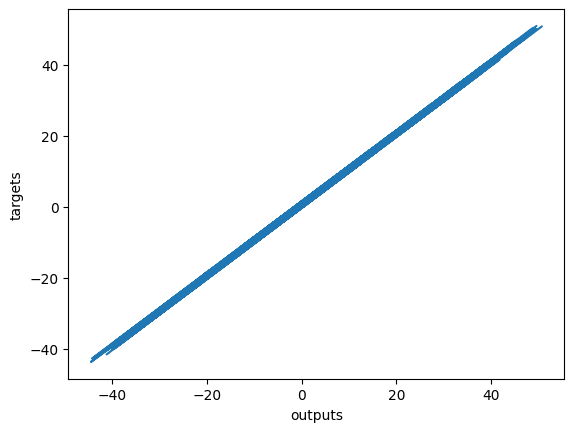

In [ ]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()